## [KMNIST](https://pytorch.org/docs/stable/torchvision/datasets.html#kmnist)

In [7]:
import os
import random
import numpy as np
import torch
import torchvision

In [8]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [9]:
dataset = torchvision.datasets.KMNIST('../data', download=True)

In [10]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.mnist.KMNIST'>


In [11]:
print(len(dataset))

60000


In [12]:
n = 200
data, target = dataset[n]

In [13]:
print(type(data))

<class 'PIL.Image.Image'>


In [14]:
print(data.mode, data.width, data.height)

L 28 28


In [15]:
print(type(target))

<class 'int'>


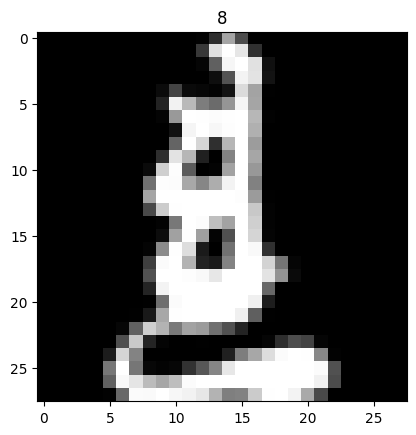

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data, cmap='gray')
data.show()

In [17]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.KMNIST('../data', transform = ToTensor)

In [18]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 1, 28, 28])
torch.Size([28, 28])


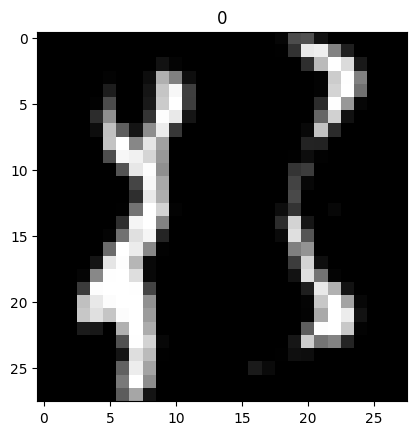

In [19]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(color)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic, cmap='gray')
    plt.show()
    break

In [20]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


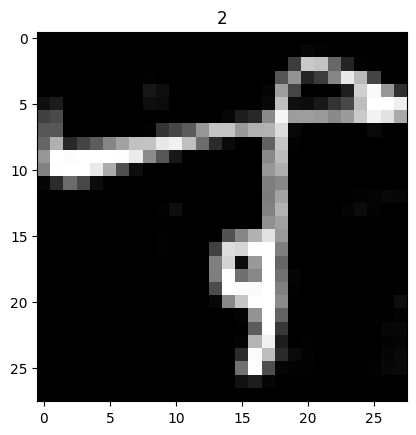

In [21]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    img = img[0] 
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(img, cmap='gray')
    plt.show()
    break

In [22]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total number of data: 60000
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Total number of data: 60000
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 60]
Total number of data: 60000


In [23]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [24]:
import torchvision.transforms as transforms
compose = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))
])

train_data = torchvision.datasets.KMNIST(root='./data/', train=True, transform=compose, download=True)
test_data  = torchvision.datasets.KMNIST(root='./data/', train=False, transform=compose, download=True)

100%|██████████| 18165135/18165135 [00:00<00:00, 27218701.17it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 873200.30it/s]


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:00<00:00, 17318983.80it/s]


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 17016510.68it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [25]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 60000
test sets: 10000


In [26]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [27]:
class KMNISTModel(nn.Module):
    def __init__(self, output_size):
        super(KMNISTModel, self).__init__()

        self.c1 = nn.Conv2d(1, 8, kernel_size=3) # (n, 1, 28, 28) -> (n, 8, 26, 26)
        # MaxPool2d(2) # (n, 8, 26, 26) -> (n, 8, 13, 13)
        self.c2 = nn.Conv2d(8, 16, kernel_size=3) # (n, 8, 13, 13) -> (n, 16, 11, 11)
        self.c3 = nn.Conv2d(16, 32, kernel_size=3) # (n, 16, 11, 11) -> (n, 32, 9, 9)
        self.c4 = nn.Conv2d(32, 32, kernel_size=1) # (n, 32, 9, 9) -> (n, 32, 9, 9)

        nn.init.kaiming_normal_(self.c1.weight)
        nn.init.kaiming_normal_(self.c2.weight)
        nn.init.kaiming_normal_(self.c3.weight)
        nn.init.kaiming_normal_(self.c4.weight)
        
        self.cv = nn.Sequential(
                self.c1,
                nn.BatchNorm2d(8),
                nn.ReLU(),
                nn.MaxPool2d(2),
                self.c2,
                nn.BatchNorm2d(16),
                nn.ReLU(),
                self.c3,
                nn.BatchNorm2d(32),
                nn.ReLU(),
                self.c4,
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.Dropout(0.2)
        )

        self.l1 = nn.Linear(32*9*9, output_size)
        nn.init.kaiming_normal_(self.l1.weight)

        self.fc = nn.Sequential(self.l1, 
                        nn.BatchNorm1d(output_size))        

    def forward(self, x):
        x = self.cv(x)
        x = x.view(-1, 32*9*9)
        output = self.fc(x)
        value = torch.max(output, 1)[1]
        return output, value

In [28]:
model = KMNISTModel(10).to(device)

In [29]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 1, 28, 28])
tensor([[ 1.0908e+00, -2.2904e-01, -1.7137e+00, -5.7939e-02,  1.4512e-01,
          1.7079e-01,  6.2624e-01,  1.1868e+00, -1.3236e+00,  5.2280e-01],
        [ 1.8171e-01, -1.1016e+00,  3.5697e-01,  4.8663e-01, -9.5915e-01,
         -2.0654e+00,  3.7226e-01,  8.5459e-01, -8.1590e-01,  1.1749e+00],
        [ 9.3571e-01,  1.7886e+00, -1.8582e+00, -1.5513e+00,  2.0076e+00,
         -3.8023e-01,  2.5614e-01, -1.9996e+00,  4.6264e-01, -1.5102e-01],
        [-1.4251e+00,  8.8277e-02,  1.2008e-01,  1.5868e+00, -9.3728e-01,
          5.8873e-01, -8.0577e-01,  1.5581e-01,  4.8161e-01, -3.3150e-01],
        [ 1.4841e+00, -1.1064e+00,  8.7821e-01, -4.5013e-01,  1.6622e+00,
         -8.1539e-01, -2.1911e-01,  7.4888e-01,  1.5377e+00, -1.3069e+00],
        [-2.4367e-01,  3.9643e-01,  7.2927e-02, -1.4087e+00, -5.8279e-01,
         -6.7990e-01, -8.1737e-01, -6.8247e-01,  3.4061e-01,  1.1957e+00],
        [-4.1636e-01, -9.0972e-01,  1.1189e+00,  4.7680e-01, -2.1344e-01,
    

In [30]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [31]:
model = KMNISTModel(10).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 5 # 5회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y, _ = model(train_data)
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_data
        del train_target

    model.eval()
    n_test = 0
    test_loss = 0
    correct = 0
    total = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred, idx_pred = model(test_data)
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1
        total += len(test_target)
        correct += (idx_pred == test_target).sum()

    accuracy = correct * 100 / total
    print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
            epoch, train_loss / n_train, test_loss / n_test,
            accuracy
        ))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 0th training loss: 0.668754979968071 test loss: 0.6798128068447113, accuracy: 82.97999572753906
epoch 1th training loss: 0.27057651604215305 test loss: 0.43368002474308015, accuracy: 89.82999420166016
epoch 2th training loss: 0.16673133795460066 test loss: 0.32469840347766876, accuracy: 91.88999938964844
epoch 3th training loss: 0.1217290266106526 test loss: 0.2818421691656113, accuracy: 92.13999938964844
epoch 4th training loss: 0.09592973490556081 test loss: 0.2321185827255249, accuracy: 93.7699966430664


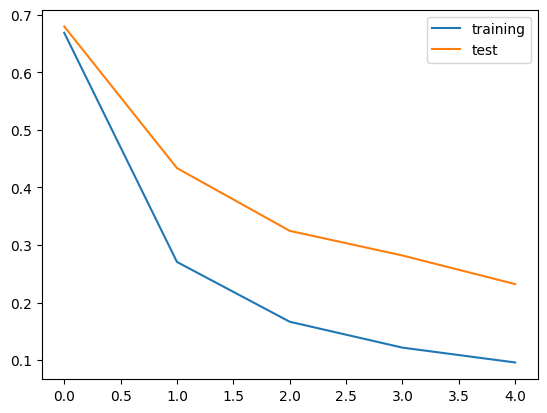

In [32]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import accuracy_score
import numpy as np

model.eval()
y_test = None
y_pred = None
for test_data, test_target in test_loader:
    test_data = test_data.to(device)
    test_target = test_target.to(device)
    _, y = model(test_data)
    del test_data
    if None == y_test:
        y_test = test_target
    else:
        torch.cat([y_test, test_target], dim=0)
    if None == y_pred:
        y_pred = y
    else:
        torch.cat([y_pred, y], dim=0)

score = accuracy_score(y_test.cpu(), y_pred.cpu())
print(score)

0.932
